<a href="https://colab.research.google.com/github/wuchienhsun/Spaceship-Titanic/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [256]:
%matplotlib inline
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [257]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [258]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [259]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [260]:
# Port => P => left and starboard => S => right
# separate Cabin => deck-num/side
# isSame group check if is family using passengerId and Name to know

In [261]:
# split cabin function
letter_count = dict(zip(string.ascii_uppercase, range(1,27)))

group_dict = {}

def split_cabins(cabins):
  cp_list = []
  side_list = []
  single_room_list = []
  room_people_nums = []
  for cabin in cabins:
    cp, side = split_cabin(cabin)
    cp_list.append(cp)
    side_list.append(side)
  for cabin in cabins:
    single_room_list.append(check_is_single_room(cabin)) 
    room_people_nums.append(check_room_people_nums(cabin))
  return cp_list, side_list, single_room_list, room_people_nums

def split_cabin(cabin):
  cabin_data_list = cabin.split('/')
  group_key = cabin_data_list[0] + cabin_data_list[1]
  if group_key in group_dict:
    group_dict[group_key] += 1
  else:
    group_dict[group_key] = 1

  cabin_position =  letter_count[cabin_data_list[0]]
  if cabin_data_list[2] == 'S':
    # S
    side = 1
  else:
    # P
    side = 0
  return cabin_position, side

def check_is_single_room(cabin):
  cabin_data_list = cabin.split('/')
  room_key = cabin_data_list[0] + cabin_data_list[1]
  if room_key == 'G9999':
    return 1
  if room_key in group_dict and group_dict[room_key] > 1:
    return 0
  else:
    return 1

def check_room_people_nums(cabin):
  cabin_data_list = cabin.split('/')
  room_key = cabin_data_list[0] + cabin_data_list[1]
  if room_key == 'G9999':
    return 1
  if room_key in group_dict:
    return group_dict[room_key]

In [262]:
# use PassengerId to detect have group
group_dict = {}
def split_passengerIds(passengerIds):
  for passengerId in passengerIds:
    p_key = passengerId.split('_')
    group_key = p_key[0]
    if group_key in group_dict:
      group_dict[group_key] += 1
    else:
      group_dict[group_key] = 1
  for passengerId in passengerIds:
    p_key = passengerId.split('_')
    group_key = p_key[0]
    if group_key in group_dict and group_dict[group_key] > 1:
      return 1
    else:
      return 0

In [263]:
def detect_cost_status(costs):
  cost_arr = []
  for cost in costs:
    cost_arr.append(detect_cost(cost))
  return cost_arr
def detect_cost(cost):
  if cost > 0:
    return 1
  return 0

In [264]:
df_test = test
df_train = train
full_data = [df_train, df_test]

for dataset in full_data:
  dataset['Group'] = split_passengerIds(dataset['PassengerId'])
  dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Earth')
  dataset['HomePlanet'] = dataset['HomePlanet'].map( {'Earth': 0, 'Europa': 1, 'Mars': 2} ).astype(int)
  dataset['CryoSleep'] = dataset['CryoSleep'].fillna(False)
  dataset['CryoSleep'] = dataset['CryoSleep'].map( {False: 0, True: 1} ).astype(int)
  dataset['Destination'] = dataset['Destination'].fillna('TRAPPIST-1e')
  dataset['Destination'] = dataset['Destination'].map( {'55 Cancri e': 0, 'PSO J318.5-22': 1, 'TRAPPIST-1e': 2} ).astype(int)

  dataset['Age'] = dataset['Age'].fillna(train['Age'].median())

  dataset['VIP'] = dataset['VIP'].fillna(False)
  dataset['VIP'] = dataset['VIP'].map( {False: 0, True: 1} ).astype(int)

  dataset['Cabin'] = dataset['Cabin'].fillna('G/9999/S')

  cp, side, single_room, room_people_nums = split_cabins(dataset['Cabin'])
  dataset['CabinPosition'] = cp
  dataset['Side'] = side

  dataset['RoomPeopleNum'] = room_people_nums

  dataset['SingleRoom'] = single_room

  dataset['RoomService'] = dataset['RoomService'].fillna(train['RoomService'].median())
  dataset['RoomService'] = detect_cost_status(dataset['RoomService'])

  dataset['FoodCourt'] = dataset['FoodCourt'].fillna(train['FoodCourt'].median())
  dataset['FoodCourt'] = detect_cost_status(dataset['FoodCourt'])

  dataset['Spa'] = dataset['Spa'].fillna(train['Spa'].median())
  dataset['Spa'] = detect_cost_status(dataset['Spa'])

  dataset['VRDeck'] = dataset['VRDeck'].fillna(train['VRDeck'].median())
  dataset['VRDeck'] = detect_cost_status(dataset['VRDeck'])

  if 'Transported' in dataset:
    dataset['Transported'] = dataset['Transported'].map( {False: 0, True: 1} ).astype(int)

In [265]:
x = np.vstack(
    (
df_train['HomePlanet'],
df_train['CryoSleep'],
df_train['Destination'],
df_train['VIP'],
df_train['CabinPosition'],
df_train['Side'],
df_train['SingleRoom'],
df_train['Group'],
df_train['RoomPeopleNum'],
df_train['Age'],
df_train['RoomService'],
df_train['FoodCourt'],
df_train['Spa'],
df_train['VRDeck'])
).T
x

array([[1., 0., 2., ..., 0., 0., 0.],
       [0., 0., 2., ..., 1., 1., 1.],
       [1., 0., 2., ..., 1., 1., 1.],
       ...,
       [0., 0., 2., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 2., ..., 1., 0., 1.]])

In [266]:
y = df_train['Transported'].to_numpy()
y

array([0, 1, 0, ..., 1, 0, 1])

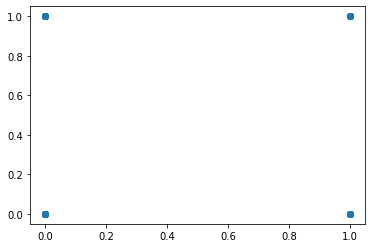

In [287]:
# colors=np.array(range(,8693))
plt.scatter(x[:, 1],y)
# plt.legend()
plt.show()

In [268]:
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.svm import SVC

In [269]:
clf = SVC(gamma = 'auto')

In [270]:
clf.fit(x, y)

SVC(gamma='auto')

In [271]:
# accuracy of training data
pca_training_acc = round(clf.score(x, y) * 100, 5)
print('Training accuracy:', pca_training_acc)

Training accuracy: 75.35948


In [272]:
y_predict = clf.predict(x)


In [273]:
test_data = np.vstack(
    (
df_test['HomePlanet'],
df_test['CryoSleep'],
df_test['Destination'],
df_test['VIP'],
df_test['CabinPosition'],
df_test['Side'],
df_test['SingleRoom'],
df_test['Group'],
df_test['RoomPeopleNum'],
df_test['Age'],
df_test['RoomService'],
df_test['FoodCourt'],
df_test['Spa'],
df_test['VRDeck'])
).T
test_data.size

59878

In [274]:
test_predict = clf.predict(test_data)
test_predict.size


4277

In [275]:
t_test_pred = pd.read_csv('svm.csv')
t_test_pred['Transported'] = t_test_pred['Transported'].map( {False: 0, True: 1} ).astype(int)
t_test_pred = t_test_pred['Transported'].to_numpy()
t_test_pred

array([1, 0, 1, ..., 1, 0, 1])

In [276]:
# # accuracy of testing data
pca_testing_acc = round(accuracy_score(test_predict, t_test_pred, normalize=True, sample_weight=None), 5)
print('Testing accuracy:', pca_testing_acc)

Testing accuracy: 0.99719


In [277]:
# test_predict
# Transported
# PassengerId
test_predict.tolist()
mapping = {1:"True", 0:"False"}
result_dict = {
            'PassengerId': df_test['PassengerId'].to_numpy().tolist(),
            'Transported': [mapping.get(x, x) for x in test_predict]
          }

df = pd.DataFrame(result_dict)
df.to_csv('qq1.csv',index=False)
